In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import scipy.stats as stats
from scipy.stats import norm, skew

In [14]:
df = pd.read_csv('df_model.csv')

In [15]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,1,group B,bachelor's degree,1,0,72,72,74,218
1,1,group C,some college,1,1,69,90,88,247
2,1,group B,master's degree,1,0,90,95,93,278
3,0,group A,associate's degree,0,0,47,57,44,148
4,0,group C,some college,1,0,76,78,75,229


In [18]:
race_ethnicity = pd.get_dummies(df["race/ethnicity"], prefix='race/ethnicity')
df=pd.concat([df,race_ethnicity], axis=1)
del df['race/ethnicity']

In [20]:
parental_education = pd.get_dummies(df["parental level of education"], prefix='parental edu')
df=pd.concat([df,parental_education], axis=1)
del df['parental level of education']

In [24]:
X = df.drop(columns=['math score', 'reading score', 'writing score', 'total score'])
y = df['total score']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,gender,lunch,test preparation course,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental edu_associate's degree,parental edu_bachelor's degree,parental edu_high school,parental edu_master's degree,parental edu_some college,parental edu_some high school
29,1,1,0,0,0,0,1,0,0,0,0,1,0,0
535,1,0,1,0,0,1,0,0,0,1,0,0,0,0
695,1,0,0,0,0,0,1,0,0,0,0,0,1,0
557,0,0,0,0,0,1,0,0,0,0,0,1,0,0
836,0,1,0,0,0,0,0,1,0,0,1,0,0,0


In [26]:
# Train
train = round((sum((y - y_train.mean())**2 for y in y_train) / len(y_train))**0.5, 0)
print(f'RMSE baseline training: {train}')

# Test
test = round((sum((y - y_test.mean())**2 for y in y_test) / len(y_test))**0.5, 0)
print(f'RMSE baseline test: {test}')

RMSE baseline training: 42.0
RMSE baseline test: 44.0


In [28]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred_train = lr.predict(X_train)

In [30]:
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)
print('Mean squared error (MSE): %.2f'% mean_squared_error(y_train, y_pred_train))
print('Coefficient of determination (R^2): %.2f'% r2_score(y_train, y_pred_train))

Coefficients: [ 1.20053975e+01  2.82125495e+01  2.23815493e+01  4.36339058e+15
  4.36339058e+15  4.36339058e+15  4.36339058e+15  4.36339058e+15
 -1.58084143e+15 -1.58084143e+15 -1.58084143e+15 -1.58084143e+15
 -1.58084143e+15 -1.58084143e+15]
Intercept: -2782549150204941.0
Mean squared error (MSE): 1349.57
Coefficient of determination (R^2): 0.25


In [31]:
y_pred_test = lr.predict(X_test)

In [32]:
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)
print('Mean squared error (MSE): %.2f' % mean_squared_error(y_test, y_pred_test))
print('Coefficient of determination (R^2): %.2f'% r2_score(y_test, y_pred_test))

Coefficients: [ 1.20053975e+01  2.82125495e+01  2.23815493e+01  4.36339058e+15
  4.36339058e+15  4.36339058e+15  4.36339058e+15  4.36339058e+15
 -1.58084143e+15 -1.58084143e+15 -1.58084143e+15 -1.58084143e+15
 -1.58084143e+15 -1.58084143e+15]
Intercept: -2782549150204941.0
Mean squared error (MSE): 1601.49
Coefficient of determination (R^2): 0.17


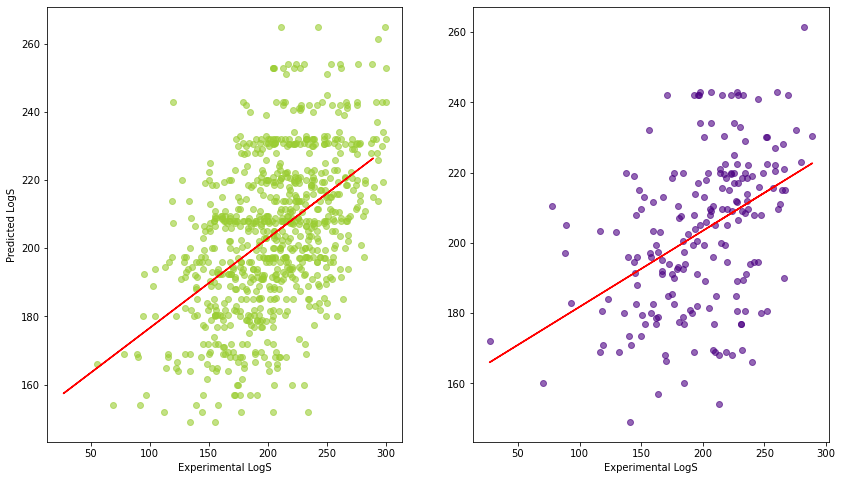

In [67]:
plt.figure(figsize=(14,8))

# 1 row, 2 column, plot 1
plt.subplot(1, 2, 1)
plt.scatter(x=y_train, y=y_pred_train, c="yellowgreen", alpha=0.6)

z = np.polyfit(y_train, y_pred_train, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"red")

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')

# 1 row, 2 column, plot 2
plt.subplot(1, 2, 2)
plt.scatter(x=y_test, y=y_pred_test, c="indigo", alpha=0.6)

z = np.polyfit(y_test, y_pred_test, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"red")

plt.xlabel('Experimental LogS')

plt.savefig('plot_horizontal_logS.png')
plt.show()

In [71]:
pd.DataFrame(list(zip(X, lr.coef_)), columns=['Feature', 'Coefficient']).sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
7,race/ethnicity_group E,4.363391e+15
6,race/ethnicity_group D,4.363391e+15
5,race/ethnicity_group C,4.363391e+15
4,race/ethnicity_group B,4.363391e+15
3,race/ethnicity_group A,4.363391e+15
1,lunch,2.821255e+01
2,test preparation course,2.238155e+01
0,gender,1.200540e+01
9,parental edu_bachelor's degree,-1.580841e+15
11,parental edu_master's degree,-1.580841e+15
